In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

### Loading a data set 

In [3]:
# creating database connection 
conn = sqlite3.connect('inventory.db')

# fetching vendor summary data 
df = pd.read_sql_query("select * from vendor_sales_summary",conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,0,0,145080,3811251.60,142049.0,5.101920e+06,68601.68,1290667.91,0.252977,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,0,0,164038,3804041.22,160247.0,4.819073e+06,144929.24,1015032.27,0.210628,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,0,0,187407,3418303.68,187140.0,4.538121e+06,123780.22,1119816.92,0.246758,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,0,0,201682,3261197.94,200412.0,4.475973e+06,257032.07,1214774.94,0.271399,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,0,0,138109,3023206.01,135838.0,4.223108e+06,257032.07,1199901.61,0.284128,0.983556,1.396897


### Exploratory analysis



In [4]:
# summary satistics 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10693.0,10649.892921,18752.805318,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10693.0,18037.744319,12662.525384,58.00,5789.000000,18761.000000,25514.000000,9.063100e+04
PurchasePrice,10693.0,24.383023,109.264519,0.00,6.840000,10.450000,19.470000,5.681810e+03
ActualPrice,10693.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000e+00
Volume,10693.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000e+00
TotalPurchaseQuantity,10693.0,3140.781539,11094.573249,1.00,36.000000,262.000000,1978.000000,3.376600e+05
TotalPurchaseDollars,10693.0,30103.877820,123062.388765,0.00,453.180000,3655.230000,20733.420000,3.811252e+06
TotalSalesQuantity,10693.0,3077.356308,10952.346909,0.00,33.000000,261.000000,1929.000000,3.349390e+05
TotalSalesDollars,10693.0,42244.312108,167648.300465,0.00,729.270000,5298.210000,28406.050000,5.101920e+06
FreightCost,10693.0,61428.920862,60937.665572,0.09,14069.870000,50293.620000,79528.990000,2.570321e+05


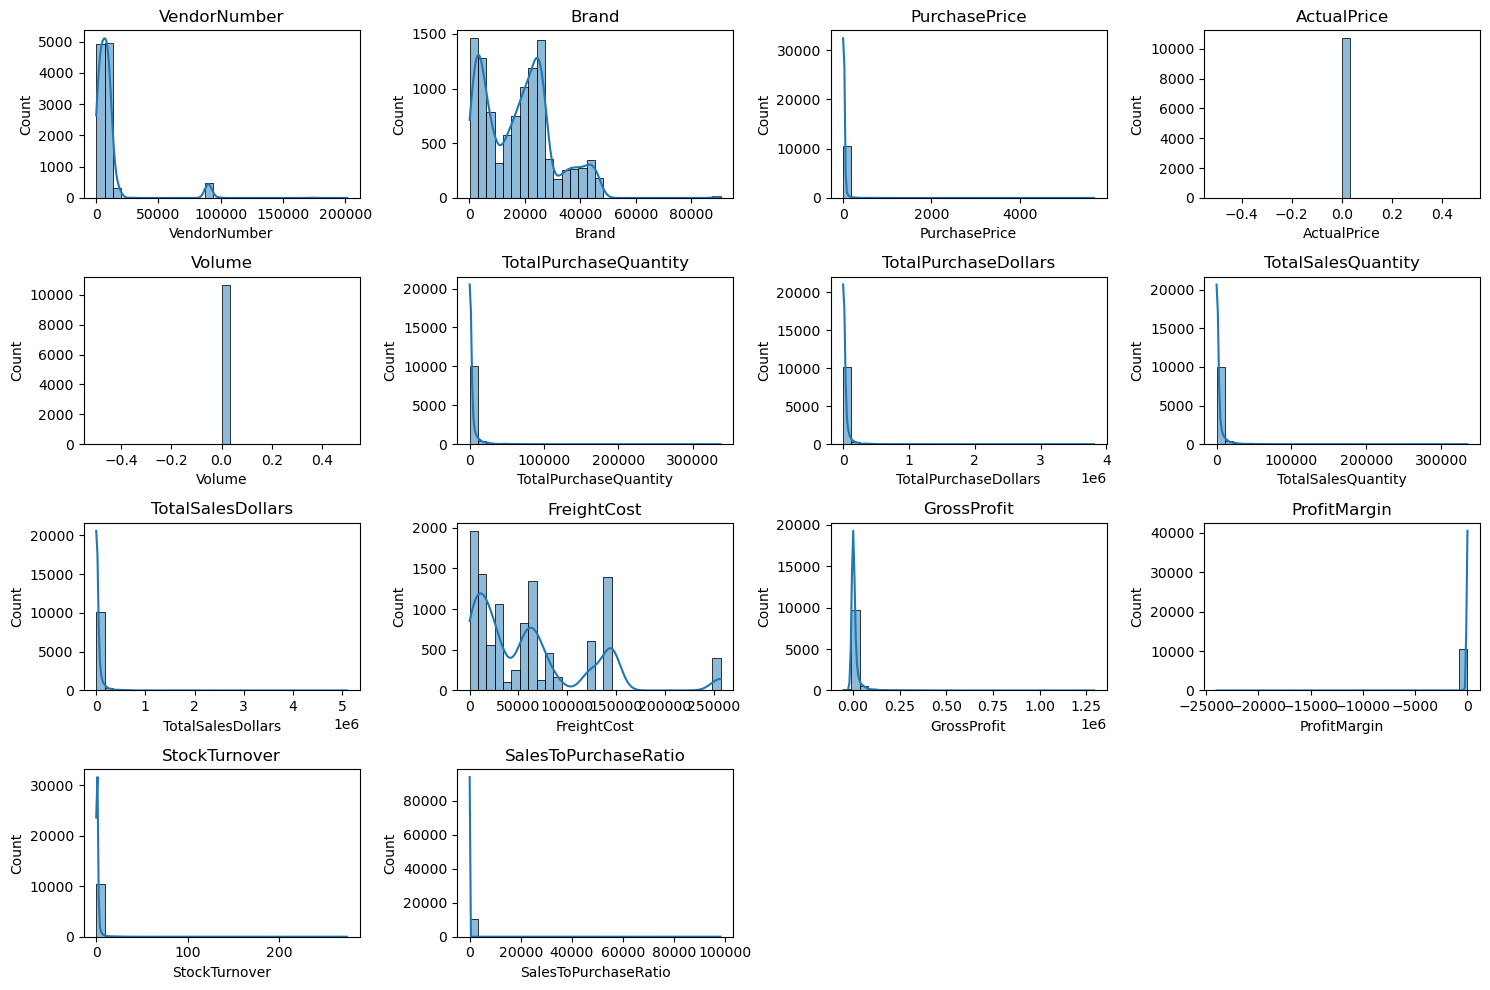

In [5]:
# Distrubution Plots for Numericals columns 
numerical_cols = df.select_dtypes(include = np.number).columns

plt.figure(figsize = (15 ,10 ))
for i , col in enumerate(numerical_cols):
    plt.subplot(4,4 , i+1) # Adjust grid layout as needed
    sns.histplot(df[col] , kde = True , bins = 30)
    plt.title(col)
plt.tight_layout()
plt.show() 

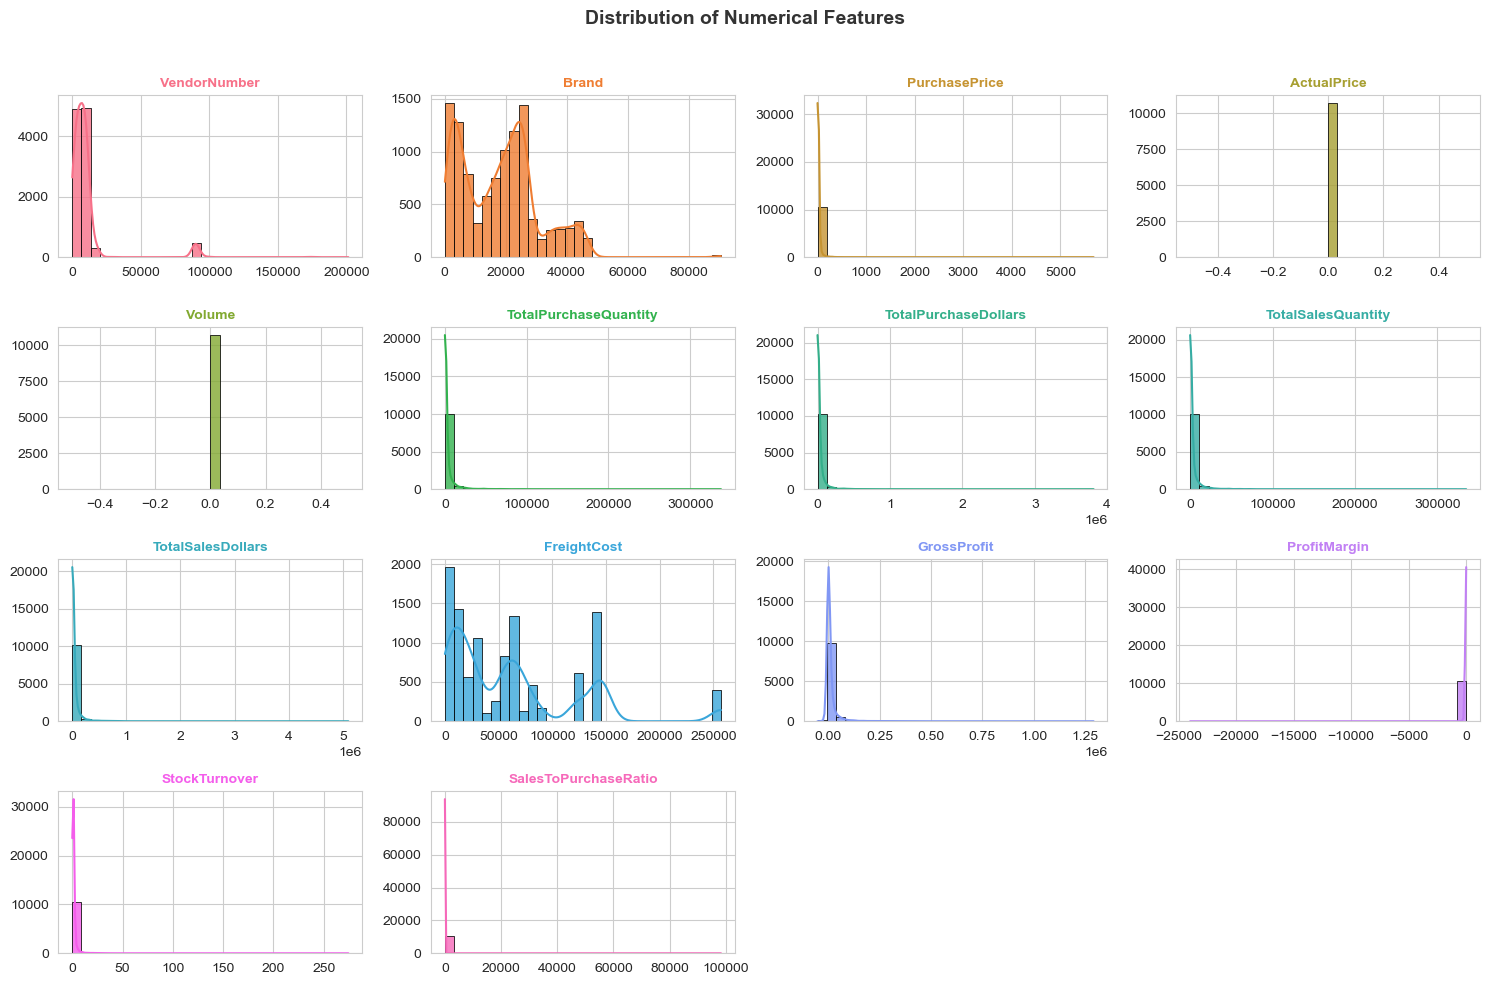

In [6]:
# Colorful distribution plots
sns.set_style("whitegrid")
palette = sns.color_palette("husl", len(numerical_cols))

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    sns.histplot(
        df[col],
        kde=True,
        bins=30,
        color=palette[i % len(palette)],
        alpha=0.8,
        edgecolor="black"
    )
    plt.title(col, fontsize=10, color=palette[i % len(palette)], fontweight='bold')
    plt.xlabel("")
    plt.ylabel("")

plt.suptitle("Distribution of Numerical Features", fontsize=14, fontweight='bold', color="#333")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

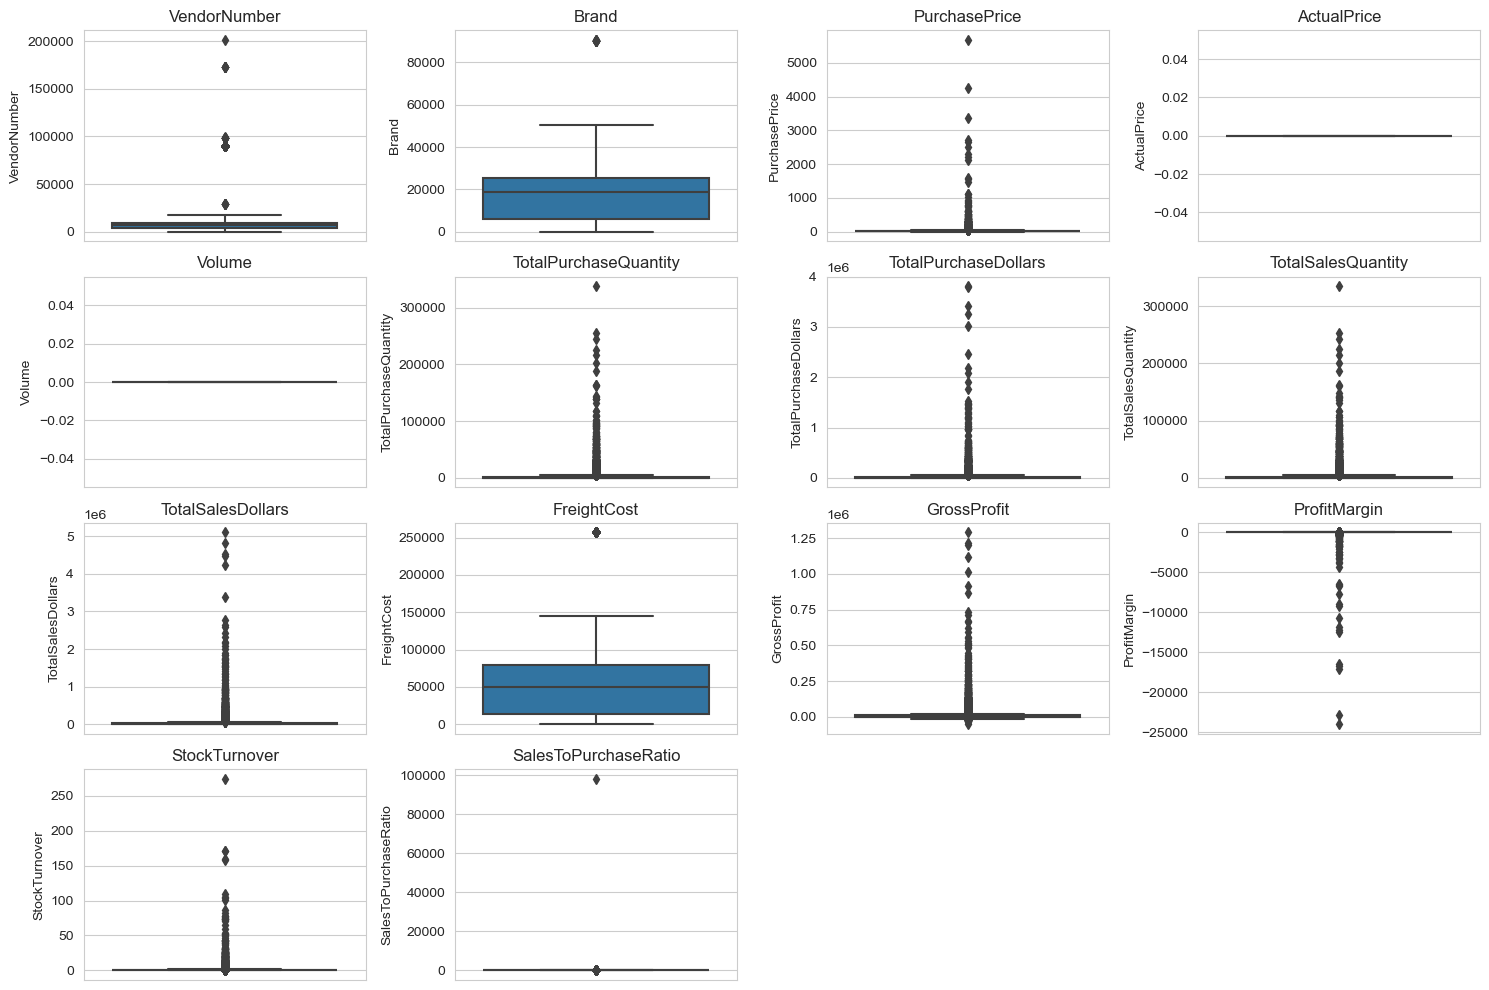

In [7]:
# outlier Detection with Boxplots
plt.figure(figsize = (15 , 10 ))
for i , col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

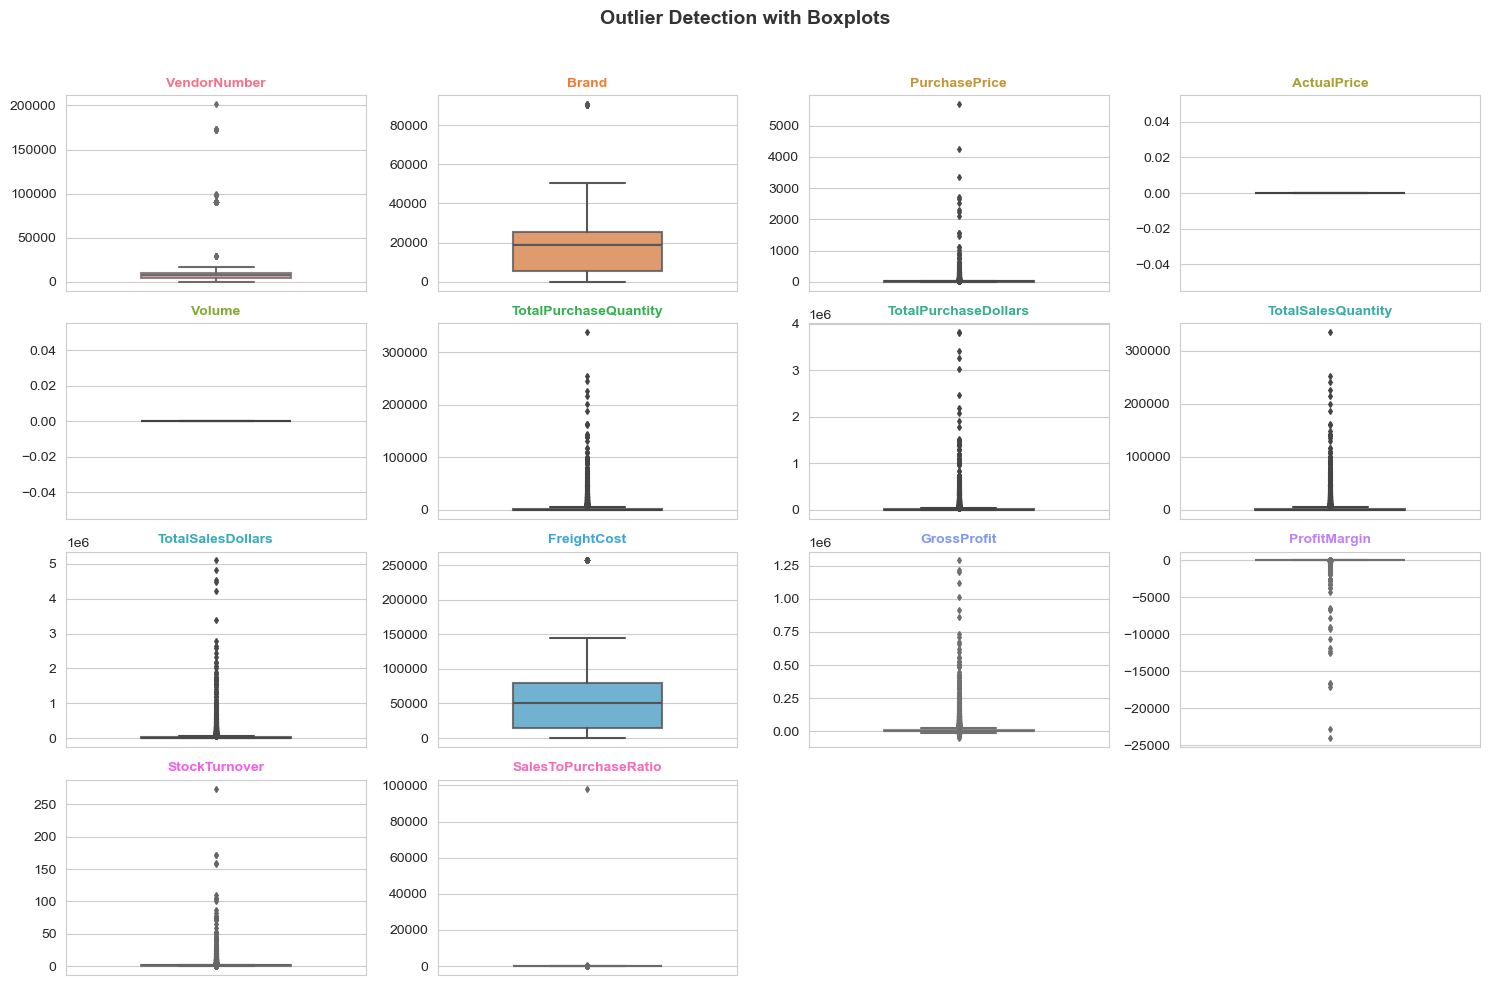

In [8]:
# Colorful Outlier Detection with Boxplots
sns.set_style("whitegrid")
palette = sns.color_palette("husl", len(numerical_cols))

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(
        y=df[col],
        color=palette[i % len(palette)],
        width=0.5,
        fliersize=3,
        boxprops=dict(alpha=0.8)
    )
    plt.title(col, fontsize=10, color=palette[i % len(palette)], fontweight='bold')
    plt.xlabel("")
    plt.ylabel("")

plt.suptitle("Outlier Detection with Boxplots", fontsize=14, fontweight='bold', color="#333")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [9]:
# let's filter the data by removing inconsistences 
df = pd.read_sql_query("""SELECT *
FROM vendor_sales_summary
WHERE GrossProfit > 0
AND ProfitMargin > 0
AND TotalSalesQuantity > 0 """ , conn)

In [10]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,0,0,145080,3811251.60,142049.0,5.101920e+06,68601.68,1290667.91,0.252977,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,0,0,164038,3804041.22,160247.0,4.819073e+06,144929.24,1015032.27,0.210628,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,0,0,187407,3418303.68,187140.0,4.538121e+06,123780.22,1119816.92,0.246758,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,0,0,201682,3261197.94,200412.0,4.475973e+06,257032.07,1214774.94,0.271399,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,0,0,138109,3023206.01,135838.0,4.223108e+06,257032.07,1199901.61,0.284128,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8561,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0,0,6,2.34,134.0,6.566000e+01,50293.62,63.32,0.964362,22.333333,28.059829
8562,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0,0,2,1.48,2.0,1.980000e+00,14069.87,0.50,0.252525,1.000000,1.337838
8563,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,0,0,1,1.47,72.0,1.432800e+02,257032.07,141.81,0.989740,72.000000,97.469388
8564,7245,PROXIMO SPIRITS INC.,3065,Three Olives Grape Vodka,0.71,0,0,1,0.71,86.0,8.514000e+01,38994.78,84.43,0.991661,86.000000,119.915493


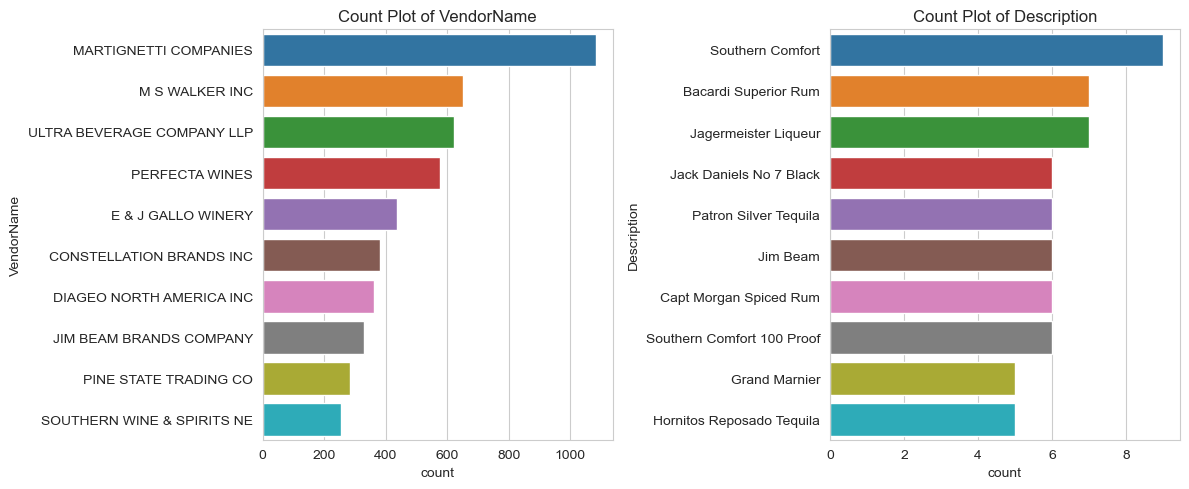

In [11]:
#Count Plots for categorical Columns 
categorical_cols = ["VendorName" , "Description"]

plt.figure(figsize = (12 , 5 ))
for i , col in enumerate(categorical_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(y=df[col] , order = df[col].value_counts().index[:10]) # Top 10 categories
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()

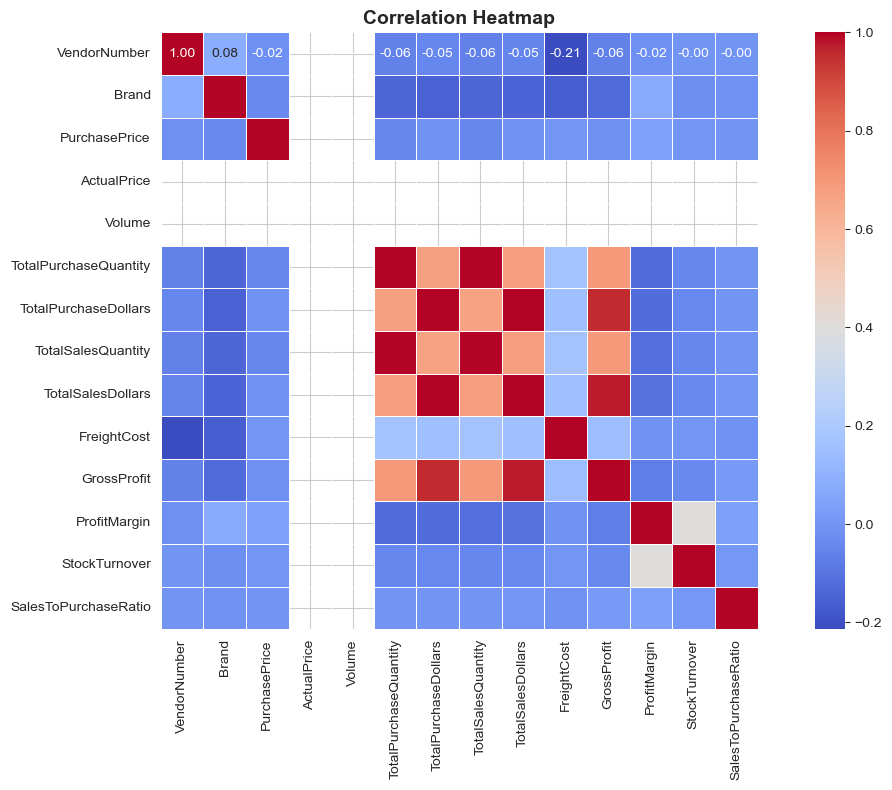

In [12]:
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_cols].corr()

sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    square=True  # keeps cells square and avoids stretching
)
plt.title("Correlation Heatmap", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


In [13]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin':'mean'}).reset_index()

In [14]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [15]:
low_sales_threshold

560.357

In [16]:
high_margin_threshold

0.6503587868318031

In [17]:
# Filter brands with low sales but high profit margins
target_brands = brand_performance [
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) & 
    (brand_performance['ProfitMargin'] >= high_margin_threshold) ]

print("Brands with Low Sales but High Profit Margin :-")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with Low Sales but High Profit Margin :-


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,0.664665
2369,Debauchery Pnt Nr,11.58,0.659758
2070,Concannon Glen Ellen Wh Zin,15.95,0.834483
2188,Crown Royal Apple,27.86,0.898062
6237,Sauza Sprklg Wild Berry Marg,27.96,0.821531
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,0.767473
2271,Dad's Hat Rye Whiskey,538.89,0.818516
57,A Bichot Clos Marechaudes,539.94,0.677409
6245,Sbragia Home Ranch Merlot,549.75,0.664447


In [18]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars']<1000 ] #For better Visualization

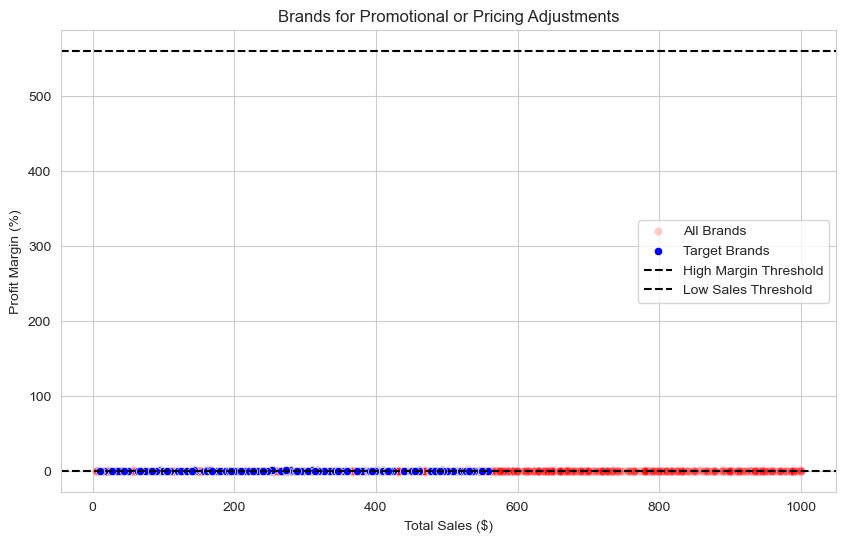

In [19]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = brand_performance , x = 'TotalSalesDollars' , y = 'ProfitMargin',color = "red", label = "All Brands",alpha = 0.2)
sns.scatterplot(data = target_brands , x = 'TotalSalesDollars' , y = 'ProfitMargin',color = "blue", label = "Target Brands")

plt.axhline(high_margin_threshold , linestyle = '--' , color = 'black' , label = "High Margin Threshold")
plt.axhline(low_sales_threshold , linestyle = '--' , color = 'black' , label = "Low Sales Threshold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()

### which vendors and brands demonstrate the highest sales performance ?

In [20]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value / 1_000:2f}K"
    else:
        return str(value)

In [21]:
top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)


In [22]:
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      6.799010e+07
MARTIGNETTI COMPANIES         3.933036e+07
PERNOD RICARD USA             3.206320e+07
JIM BEAM BRANDS COMPANY       3.142302e+07
BACARDI USA INC               2.485482e+07
CONSTELLATION BRANDS INC      2.421875e+07
E & J GALLO WINERY            1.839990e+07
BROWN-FORMAN CORP             1.824723e+07
ULTRA BEVERAGE COMPANY LLP    1.650254e+07
M S WALKER INC                1.470646e+07
Name: TotalSalesDollars, dtype: float64

In [23]:
top_brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollars, dtype: float64

In [24]:
top_brands.apply(lambda x: format_dollars(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSalesDollars, dtype: object

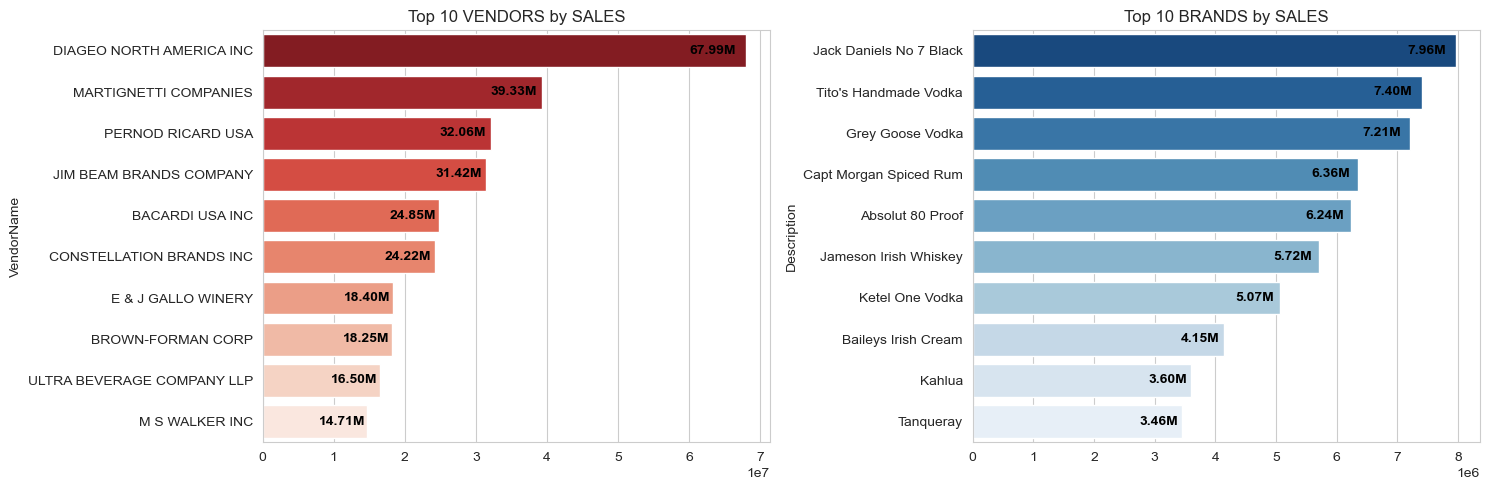

In [25]:
plt.figure(figsize=(15,5))

# --- Plot for Top Vendors ---
plt.subplot(1,2,1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Reds_r")
plt.title("Top 10 VENDORS by SALES")

for bar in ax1.patches:
    width = bar.get_width()
    ax1.text(width * 0.98,                              # slightly before the bar edge
             bar.get_y() + bar.get_height() / 2,
             format_dollars(width),
             ha='right', va='center',
             fontsize=10, color='black', fontweight='bold')

# --- Plot for Top Brands ---
plt.subplot(1,2,2)
ax2 = sns.barplot(y=top_brands.index, x=top_brands.values, palette="Blues_r")
plt.title("Top 10 BRANDS by SALES")

for bar in ax2.patches:
    width = bar.get_width()
    ax2.text(width * 0.98,
             bar.get_y() + bar.get_height() / 2,
             format_dollars(width),
             ha='right', va='center',
             fontsize=10, color='black', fontweight='bold')

plt.tight_layout()
plt.show()


### Which vendors contribute the most to total purchase dollars?

In [26]:
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars' : 'sum',
    'GrossProfit':'sum',
    'TotalSalesDollars':'sum'
}).reset_index()
vendor_performance.shape

(119, 4)

In [27]:
vendor_performance['PurchaseContribution%'] = vendor_performance['TotalPurchaseDollars']/ vendor_performance['TotalPurchaseDollars'].sum()*100

In [28]:
vendor_performance = round(vendor_performance.sort_values('PurchaseContribution%' , ascending = False),2)

In [29]:
#Display Top 10 VEndors 

top_vendors = vendor_performance.head(10)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18


In [30]:
top_vendors['PurchaseContribution%'].sum()

65.69000000000001

In [31]:
top_vendors['Cumulative_Contribution%'] = top_vendors['PurchaseContribution%'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,Cumulative_Contribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30,24.60
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76,32.36
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64,40.00
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67,45.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97,50.64
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31,54.95
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93,58.88
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63,62.51
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18,65.69


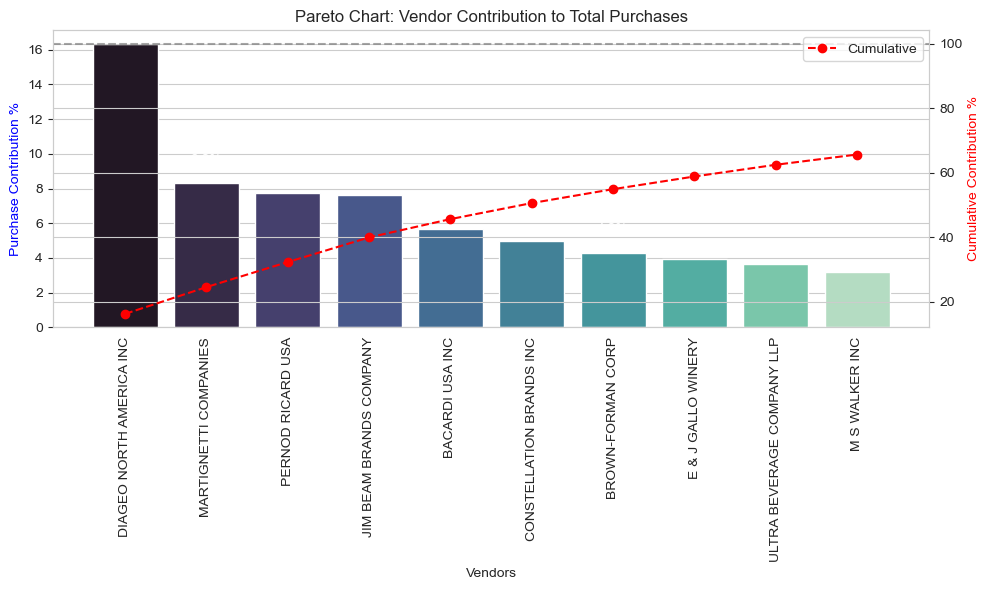

In [32]:
top_vendors['Cumulative_Contribution%'] = top_vendors['PurchaseContribution%'].cumsum()

fig, ax1 = plt.subplots(figsize=(10, 6))

# --- Bar plot for Purchase Contributions ---
sns.barplot(
    x=top_vendors['VendorName'],
    y=top_vendors['PurchaseContribution%'],
    palette="mako",
    ax=ax1
)

# Add value labels on bars
for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(
        i, value + 1, f'{value:.1f}%',
        ha='center', va='bottom', fontsize=10, color='white'
    )

# --- Line Plot for Cumulative Contributions ---
ax2 = ax1.twinx()
ax2.plot(
    top_vendors['VendorName'],
    top_vendors['Cumulative_Contribution%'],
    color='red',
    marker='o',
    linestyle='dashed',
    label='Cumulative'
)

# --- Formatting and labels ---
ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

# Horizontal reference line
ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [33]:
print(f"Total Purchase Contribution of top 10 vendors is {round(top_vendors['PurchaseContribution%'].sum(),2)}%")

Total Purchase Contribution of top 10 vendors is 65.69%


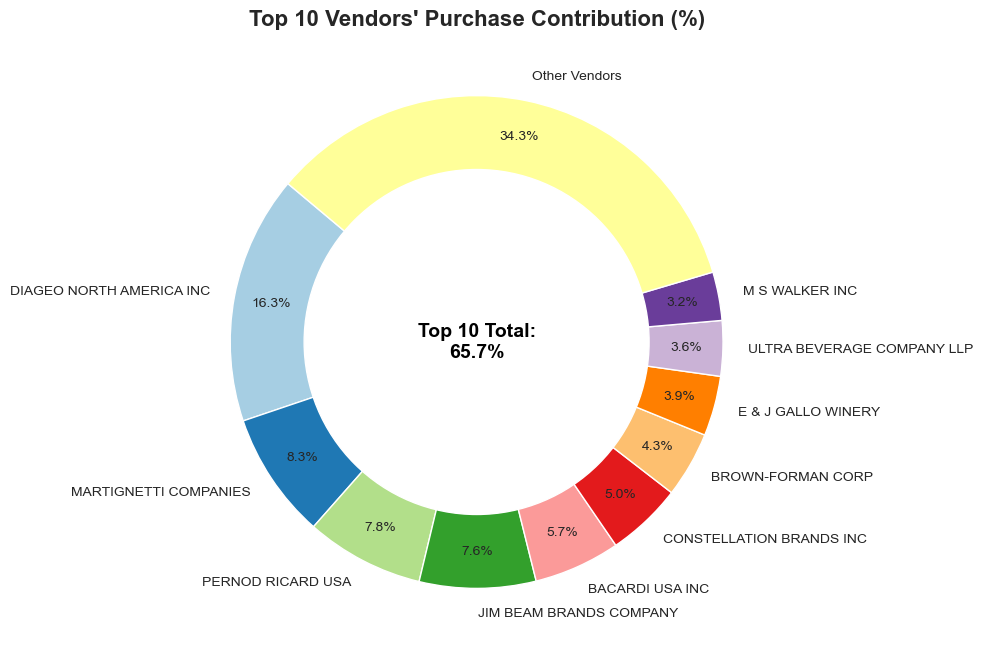

In [34]:
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['PurchaseContribution%'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# Append "Other Vendors" category 
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Donut chart 
fig, ax = plt.subplots(figsize=(8,8))
wedges, texts, autotexts = ax.pie(
    purchase_contributions,
    labels=vendors,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85,
    colors=plt.cm.Paired.colors
)

# Draw a white circle in the center to create a donut effect
center_circle = plt.Circle((0,0), 0.70, fc='white')
fig.gca().add_artist(center_circle)

# Add total contribution annotation in the center
plt.text(0, 0,
         f"Top 10 Total:\n{total_contribution:.1f}%",
         fontsize=14, fontweight='bold',
         ha='center', va='center', color='black')

plt.title("Top 10 Vendors' Purchase Contribution (%)", fontsize=16, fontweight='bold')
plt.show()


In [35]:
df['UnitPurchasePrice']  = df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']

In [36]:
df["OrderSize"] = pd.qcut(df["TotalPurchaseQuantity"] , q = 3 , labels = ["small" , "medium" , "large"])

In [37]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
small,39.057543
medium,15.482067
large,10.774898


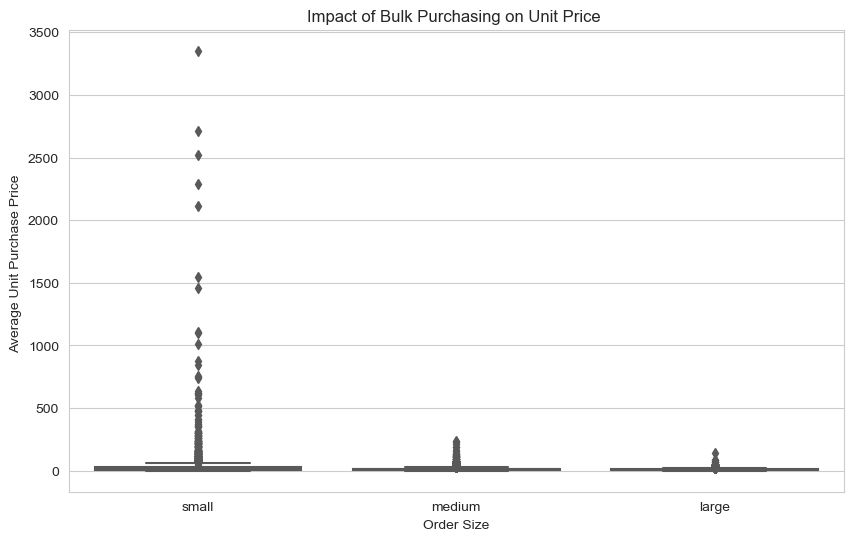

In [38]:
plt.figure(figsize = (10 , 6))
sns.boxplot( data = df , x = "OrderSize" , y = "UnitPurchasePrice" , palette = "Set2")
plt.title("Impact of Bulk Purchasing on Unit Price ")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price ")
plt.show()

### Which vendors have low inventory turnover , indicating excess stock and slow - moving products ?


In [39]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover',ascending = True)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
...,...
DISARONNO INTERNATIONAL LLC,0.975577
"PREMIUM PORT WINES, INC.",0.976077
TY KU LLC,0.976982


### How much capital is locked unsold inventory per vendor , and which vendor contribute the most to it ?

In [41]:
df["UnsoldIventoryValue"] = (df["TotalPurchaseQuantity"] - df["TotalSalesQuantity"])* df["PurchasePrice"]
print('Total Unsold Capital :' , format_dollars(df["UnsoldIventoryValue"].sum()))

Total Unsold Capital : 2.71M


In [43]:
# Aggregate Capital Locked per Vendor 
inventory_value_per_vendor = df.groupby("VendorName")["UnsoldIventoryValue"].sum().reset_index()

#Sort Vendors with the Highest Locked Capital 
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by = "UnsoldIventoryValue",ascending = False)
inventory_value_per_vendor['UnsoldIventoryValue'] = inventory_value_per_vendor['UnsoldIventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldIventoryValue
25,DIAGEO NORTH AMERICA INC,722.209050K
46,JIM BEAM BRANDS COMPANY,554.665630K
68,PERNOD RICARD USA,470.625610K
116,WILLIAM GRANT & SONS INC,401.960830K
30,E & J GALLO WINERY,228.282610K
79,SAZERAC CO INC,198.436410K
11,BROWN-FORMAN CORP,177.733740K
20,CONSTELLATION BRANDS INC,133.617620K
61,MOET HENNESSY USA INC,126.477700K
77,REMY COINTREAU USA INC,118.598150K


### What is the 95% confidence intervals for profit of top- performing vendors.

In [44]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

In [49]:
top_vendors = df[df["TotalSalesDollars"] >= top_threshold] ["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold] ["ProfitMargin"].dropna()


In [50]:
low_vendors

5631    0.041118
5652    0.061456
5701    0.120073
5704    0.016773
5724    0.072396
          ...   
8560    0.834483
8561    0.964362
8562    0.252525
8563    0.989740
8564    0.991661
Name: ProfitMargin, Length: 2142, dtype: float64

In [55]:
def confidence_interval(data , confidence = 0.95):
    mean_val = np.mean(data)
    std_err = np.std(data , ddof = 1 ) / np.sqrt(len(data)) # Standard error
    t_critical = stats.t.ppf((1 + confidence) / 2 , df = len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean_val , mean_val - margin_of_error , mean_val + margin_of_error

Top Vendors 95% CI: (0.31, 0.32), Mean: 0.31
Low Vendors 95% CI: (0.40, 0.43), Mean: 0.42


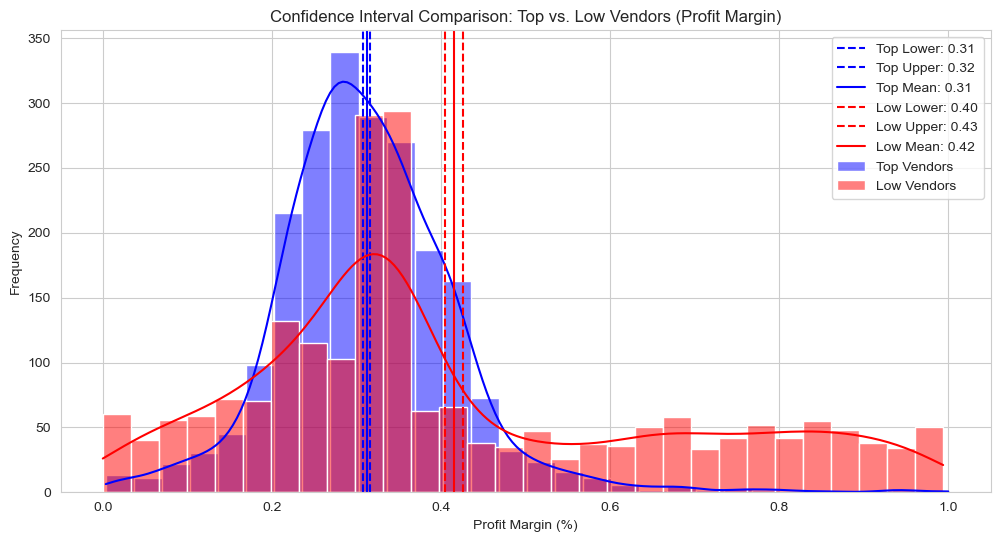

In [56]:
# Compute confidence intervals
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

# Print confidence interval results
print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

# Plot distributions
plt.figure(figsize=(12, 6))

# Top Vendors Plot
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean:.2f}")

# Low Vendors Plot
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="-", label=f"Low Mean: {low_mean:.2f}")

# Finalize Plot
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


In [57]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

top_vendors = df[df["TotalSalesDollars"] >= top_threshold] ["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold] ["ProfitMargin"].dropna()

# Perform Two - Sample T - Test 
t_stat, p_value = ttest_ind(top_vendors , low_vendors , equal_var = False )

#print Result 
print(f"T - Statistic : {t_stat:.4f} , P - Value : {p_value:.4f}")
if p_value < 0.05:
    print(" Reject He : There is a significant difference margins between top and low - performing vendors.")
else:
    print("Fail to Reject He : No significant difference in profit margins.")

T - Statistic : -17.5543 , P - Value : 0.0000
 Reject He : There is a significant difference margins between top and low - performing vendors.
